In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import csv
from statistics import mean 

In [54]:
# we need delta of bandwidth (for i in range(50, 500, 50)) this would be the x-axis
def plot_sensitivity(bandwidth_f1):
    deltaBandwidth = [i for i in range(50, 500, 50)]
    sensitivity = []
    for bandwidthDiff in deltaBandwidth:
        num_row = bandwidth_f1.shape[0]
        sensitivityTemp = []
        for i in range(0, num_row):
            j = i
            currBandwidth = bandwidth_f1.iloc[i].bandwidth
            try:
                while(bandwidth_f1.iloc[j].bandwidth - currBandwidth <= bandwidthDiff):
                    j += 1
            except IndexError:
                pass
            sensitivityTemp.append((bandwidth_f1.iloc[j-1].F1 - bandwidth_f1.iloc[i].F1)/bandwidthDiff)
        sensitivity.append(mean(sensitivityTemp))
#                 while (bandwidth_f1.iloc[j].F1 - bandwidth_f1.iloc[i-1].F1 <= -fluctuation_threshold):
#                     try:
#                         bandwidth_f1_remove_fluc = bandwidth_f1_remove_fluc.drop(bandwidth_f1.iloc[j].name)
#                     except:
#                         pass
#                     j += 1
#                     if (j >= num_row):
#                         break
                        
    # set figure size
    plt.figure(figsize=(12,6), dpi=80)

    plt.xlabel('Bandwidth Delta (Kbps)')
    plt.ylabel('Sensitivity (f1-score increment/kbps)')

    plt1 = plt.plot(deltaBandwidth, sensitivity, 'o-')
#     plt2 = plt.plot(bandwidth_f1_2['bandwidth'], bandwidth_f1_2['F1'],
#     'o-',
#     label = label2,)

    # y-axis percentage
#     plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.ticklabel_format(style='plain', axis='x', )

    plt.legend()
    plt.ion()

In [58]:
profile_rene_adaptive = pd.read_csv("./profile-highway/profile-separated/profile-14.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


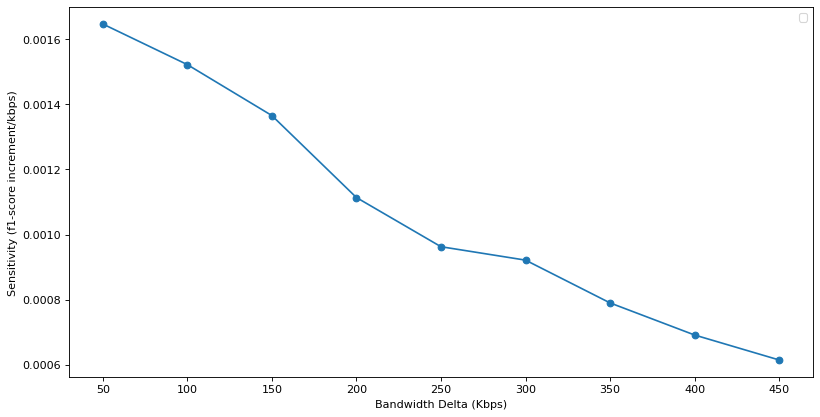

In [59]:
plot_sensitivity(profile_rene_adaptive)